In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Lecture 28 Designing Experiments

## Review: Lecture 24
From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [ ]:
# original sample

births = Table.read_table('baby.csv')
births.show(3)

In [ ]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [ ]:
# Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [ ]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

In [ ]:
left, right

In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

## Method Based on CLT

Find the left and right value for the Confidence Interval using what we know about the CLT. 

In [ ]:
sampled_ages = births.column('Maternal Age')
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)
sample_size, sample_average, sample_SD

We need to add and subtract 2 * (population SD)/(sample_size ** 0.5) but we don't have the population SD.

In [ ]:
# Try estimating it from the sample

estimated_SD_of_sample_average = sample_SD / np.sqrt(sample_size)
estimated_SD_of_sample_average

In [ ]:
# Approximate 95% confidence interval for population mean

confidence_95 = sample_average - 2*estimated_SD_of_sample_average, sample_average + 2*estimated_SD_of_sample_average
confidence_95

In [ ]:
# Recall what the left and right for the 95% was from above.
left, right

How close was your sample interval to the original interval?

## SD of 0/1 Population

***Proportions as Averages***

If the population consists of 1’s and 0’s (yes/no answers to
a question), then: </br>
● the population average is the proportion of 1’s in the
population </br>
● the sample average is the proportion of 1’s in the sample


In [ ]:
# Population of size 10

number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))

print('Standard Deviation:', np.round(np.std(zero_one_population),2))

zero_one_population

In [ ]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population 
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), 
                                    np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [ ]:
possible_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

In [ ]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop.show()

In [ ]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')

According to our table and scatterplot, what can we say is the maximum value of our standard deviation for proportions?</br>


This will be our worst case scenario.

### Connecting to Confidence Intervals

#### Recall: 
Interval Width = 4*SD of Population/√sample size </br>

Using the worst case scenario, we can find the sample size needed to get a desired width.</br>

Suppose you want the total width of the interval to be no more than 1%. How should you choose the sample size?

Calculate the minimum sample size in the cell below.


In [ ]:
sample_size = 
sample_size

### Discussion Question 1

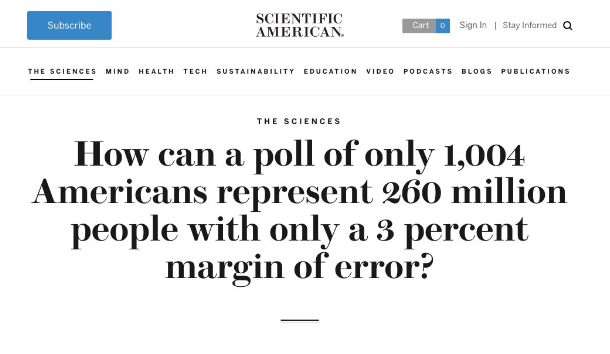
https://www.scientificamerican.com/article/howcan-a-poll-of-only-100/ </br>

Note: Margin of Error is 2 Standard Deviations.

There are two ways to approach this question:

### Discussion Question 2

A researcher is estimating a population proportion based on a random sample of size 10,000. 

Fill in the blank with a decimal:

With chance at least 95%, the estimate will be correct to within ________________.

Calculate your answer below: (Remember, Margin of Error is 2 SD, not the entire width)
